### Create the Scene

In [1]:
from pathlib import Path

from data_structures.mesh import Mesh
from data_structures.entity import Entity
from data_structures.scene import Scene
from data_structures.color import Color
from data_structures.vector3f import Vector3f as vec

from renderer import Renderer
from lightmapper import Lightmapper

pygame 2.6.1 (SDL 2.28.4, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
level_path = Path('levels/test_map_open.obj')
scene_name = 'lightmaps/test_scene_test'

In [4]:
# Create the meshes
mesh_main = Mesh().from_object(level_path)
mesh_light_1 = Mesh().from_cube()
# Convert them into entities and assign them Worldspace Transforms
entity_main = Entity(mesh_main, vec(0, 0, 0), vec(0, 0, 0), vec(1, 1, 1), Color(1, 1, 1), Color(0.0, 0.0, 0.0))
entity_light_1 = Entity(mesh_light_1, vec(0, 0, 10), vec(0, 0, 0), vec(32, 32, 32), Color(0.08, 0.01, 0.07), Color(0.08, 0.01, 0.07))
# Create the Scene
#scene = Scene().create(entities=[entity_main, entity_light_1, entity_light_2], patches_resolution=0.25).save(Path(f'{scene_name}.json'))
scene = Scene().create(entities=[entity_main, entity_light_1], patches_resolution= 0.125).save(Path(f'{scene_name}.json')) #0.25, 0,125, 0.0625

Generating patches: 100%|██████████| 88804/88804 [00:25<00:00, 3509.85it/s]


# Lightmapping

Iteration 4/4: 100%|██████████| 34884/34884 [01:14<00:00, 467.34it/s]

Image dimensions: (298, 298, 3)
Image data type: float32
Min pixel value: 0.0
Max pixel value: 0.07958984375
Saved image as debug_lightmap.png


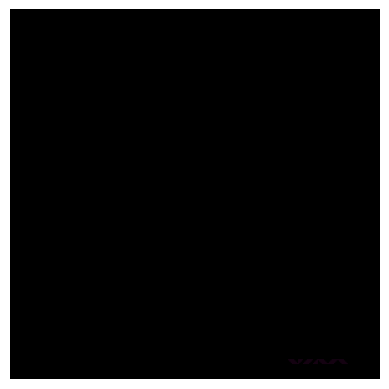

In [5]:
lightmap_renderer = Renderer(width=128, height=128, fov=90, scene=scene, atmosphere_color=Color(0, 0, 0), lightmap_mode=True)
lightmapper = Lightmapper(scene=scene, renderer=lightmap_renderer)
lightmapper.generate_lightmap(lightmap_path=Path(scene_name), iterations=4)
lightmap_renderer.destroy()